# Accessing Water Data
- [Water Point Data Exchange Website](https://www.waterpointdata.org/)
- [API Guide and Dictionary](https://dev.socrata.com/foundry/data.waterpointdata.org/eqje-vguj)
- [Documentation](https://www.waterpointdata.org/docs/WPdx_User_Guide.pdf)

In [1]:
#importing relevant packages
%run /Users/thomasadler/Desktop/futuristic-platipus/notebooks/0-ta-packages.py

In [2]:
#fetching hidden api key from desktop stored under 'water_api_key'
%run /Users/thomasadler/Desktop/futuristic-platipus/keys.py

In [3]:
#defining working directory
filepath = '/Users/thomasadler/Desktop/capstone_docs/'

In [4]:
#setting API endpoint, dataset, key and client profile
socrata_domain = 'data.waterpointdata.org'
socrata_dataset_identifier = 'eqje-vguj'
socrata_token = os.environ.get(water_api_key)
client = Socrata(socrata_domain, socrata_token, timeout=10)

The goal is to access every water point recorded in Uganda and their associated information.

In [5]:
#creating query to fetch Uganda water points, all columns included
water_uganda_query = """
select
    *
where
    clean_country_name = 'Uganda'
limit
    200000
"""

In [6]:
#query dataset and store in dataframe
results = client.get(socrata_dataset_identifier, query=water_uganda_query)
water_df = pd.DataFrame.from_records(results)

In [7]:
#keep raw dataset untouched
uganda_water_df=water_df.copy()

In [8]:
#short look at data
uganda_water_df.tail()

,row_id,source,lat_deg,lon_deg,report_date,status_id,water_tech_clean,_water_tech_category,facility_type,clean_country_name,...,notes,rehab_priority,photo_lnk,lat_deg_original,lon_deg_original,fecal_coliform_presence,pay,scheme_id,orig_lnk,fecal_coliform_value
108252,270292,youthmappers,2.8520073,32.3231249,2022-05-18T00:00:00.000,Yes,Hand Pump,Hand Pump,Improved,Uganda,...,ngom_rom,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN
108253,421099,Water4,0.783063923,33.426149078,2022-04-27T00:00:00.000,Unknown,NaN,NaN,Improved,Uganda,...,NaN,176,https://api.mwater.co/v3/images/e6a1c51282e440...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
108254,269987,youthmappers,2.8824498,32.2743901,2022-05-23T00:00:00.000,Yes,Hand Pump,Hand Pump,Improved,Uganda,...,ayac,NaN,NaN,NaN,NaN,NaN,yes,NaN,NaN,NaN
108255,270258,youthmappers,2.7894498,32.3490701,2022-05-19T00:00:00.000,Yes,Tapstand,Tapstand,Improved,Uganda,...,gulu_ptc,NaN,NaN,NaN,NaN,NaN,yes,NaN,NaN,NaN
108256,419716,Water4,0.784164132,33.516908912,2022-06-17T00:00:00.000,Yes,NaN,NaN,Improved,Uganda,...,NaN,88,https://api.mwater.co/v3/images/6617ff9975f349...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
#looking at column datatypes
uganda_water_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108257 entries, 0 to 108256
Data columns (total 67 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   row_id                     108257 non-null  object
 1   source                     108257 non-null  object
 2   lat_deg                    108257 non-null  object
 3   lon_deg                    108257 non-null  object
 4   report_date                108257 non-null  object
 5   status_id                  108257 non-null  object
 6   water_tech_clean           25659 non-null   object
 7   _water_tech_category       25659 non-null   object
 8   facility_type              108257 non-null  object
 9   clean_country_name         108257 non-null  object
 10  clean_adm1                 108257 non-null  object
 11  clean_adm2                 108257 non-null  object
 12  clean_adm3                 108257 non-null  object
 13  clean_adm4                 108257 non-null  

We exclude columns which have already been cleaned by the WPD team and stored in another "clean" column. We also exclude columns with links and urls. 

In [10]:
#drop irrelevant columns
uganda_water_df_clean=pd.DataFrame(uganda_water_df.drop(columns=['activity_id', 'adm1','adm2','adm3','country_id',\
                                                    'country_name','status','water_source','management',\
                                                    'water_tech','orig_lnk','photo_lnk','data_lnk',\
                                                    'public_data_source','converted','created_timestamp',\
                                                    'days_since_report','updated']))

#check current columns
uganda_water_df_clean.columns

Index(['row_id', 'source', 'lat_deg', 'lon_deg', 'report_date', 'status_id',
       'water_tech_clean', '_water_tech_category', 'facility_type',
       'clean_country_name', 'clean_adm1', 'clean_adm2', 'clean_adm3',
       'clean_adm4', 'distance_to_primary', 'distance_to_secondary',
       'distance_to_tertiary', 'distance_to_city', 'distance_to_town',
       'usage_cap', 'is_urban', 'staleness_score', 'is_latest', 'location_id',
       'cluster_size', 'clean_country_id', 'new_georeferenced_column_',
       'lat_lon_deg', 'count', 'water_source_clean', 'water_source_category',
       'wpdx_id', 'install_year', 'management_clean', 'status_clean',
       'installer', 'served_population', 'local_population', 'crucialness',
       'pressure', 'subjective_quality', 'notes', 'rehab_priority',
       'lat_deg_original', 'lon_deg_original', 'fecal_coliform_presence',
       'pay', 'scheme_id', 'fecal_coliform_value'],
      dtype='object')

In [11]:
#checking contents of columns we want to convert to binary
print('fecal_coliform_presence distribution:',uganda_water_df_clean['fecal_coliform_presence'].value_counts())
print('is_latest distribution:',uganda_water_df_clean['is_latest'].value_counts())
print('is_urban distribution:',uganda_water_df_clean['is_urban'].value_counts())
print('status_id distribution:',uganda_water_df_clean['status_id'].value_counts())

fecal_coliform_presence distribution: Present    1035
Absent      275
Name: fecal_coliform_presence, dtype: int64
is_latest distribution: True     96575
False    11682
Name: is_latest, dtype: int64
is_urban distribution: False    105553
True       2704
Name: is_urban, dtype: int64
status_id distribution: Yes        87016
No         18666
Unknown     2575
Name: status_id, dtype: int64


We assume that water points that have an unknown status, are not working.

In [12]:
#convert to binary
uganda_water_df_clean['fecal_coliform_presence']=uganda_water_df_clean['fecal_coliform_presence'].map({'Present': 1, 'Absent': 0})

uganda_water_df_clean['is_latest'] = uganda_water_df_clean['is_latest'].astype('int64')

uganda_water_df_clean['is_urban']=uganda_water_df_clean['is_urban'].map({True: 1, False: 0})

uganda_water_df_clean['status_id']=uganda_water_df_clean['status_id'].map({'Yes': 1, 'No': 0, 'Unknown': 0})

#check
uganda_water_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108257 entries, 0 to 108256
Data columns (total 49 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   row_id                     108257 non-null  object 
 1   source                     108257 non-null  object 
 2   lat_deg                    108257 non-null  object 
 3   lon_deg                    108257 non-null  object 
 4   report_date                108257 non-null  object 
 5   status_id                  108257 non-null  int64  
 6   water_tech_clean           25659 non-null   object 
 7   _water_tech_category       25659 non-null   object 
 8   facility_type              108257 non-null  object 
 9   clean_country_name         108257 non-null  object 
 10  clean_adm1                 108257 non-null  object 
 11  clean_adm2                 108257 non-null  object 
 12  clean_adm3                 108257 non-null  object 
 13  clean_adm4                 10

In [13]:
#convert to number
num_columns=['distance_to_city', 'distance_to_primary', 'lat_deg', 'lat_deg_original',\
             'lon_deg', 'lon_deg_original', 'distance_to_secondary', 'distance_to_tertiary',\
             'distance_to_town', 'fecal_coliform_value', 'cluster_size', 'count', 'crucialness',\
             'install_year', 'local_population', 'pressure',\
             'rehab_priority', 'served_population', 'staleness_score', 'usage_cap']

for col in num_columns:
    uganda_water_df_clean[[col]]=uganda_water_df_clean[[col]].astype('float32')

#check
uganda_water_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108257 entries, 0 to 108256
Data columns (total 49 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   row_id                     108257 non-null  object 
 1   source                     108257 non-null  object 
 2   lat_deg                    108257 non-null  float32
 3   lon_deg                    108257 non-null  float32
 4   report_date                108257 non-null  object 
 5   status_id                  108257 non-null  int64  
 6   water_tech_clean           25659 non-null   object 
 7   _water_tech_category       25659 non-null   object 
 8   facility_type              108257 non-null  object 
 9   clean_country_name         108257 non-null  object 
 10  clean_adm1                 108257 non-null  object 
 11  clean_adm2                 108257 non-null  object 
 12  clean_adm3                 108257 non-null  object 
 13  clean_adm4                 10

In [14]:
#convert to datetime
uganda_water_df_clean['report_date']=pd.to_datetime(uganda_water_df_clean['report_date'])
uganda_water_df_clean['install_year']=pd.to_datetime(uganda_water_df_clean['install_year'].astype('float32'), format='%Y')

#check
print(uganda_water_df_clean['report_date'])
print(uganda_water_df_clean['install_year'])


0        2005-09-07
1        2005-09-07
2        2005-09-07
3        2005-09-07
4        2005-09-07
            ...    
108252   2022-05-18
108253   2022-04-27
108254   2022-05-23
108255   2022-05-19
108256   2022-06-17
Name: report_date, Length: 108257, dtype: datetime64[ns]
0               NaT
1               NaT
2               NaT
3               NaT
4               NaT
            ...    
108252          NaT
108253   2020-01-01
108254          NaT
108255          NaT
108256   2020-01-01
Name: install_year, Length: 108257, dtype: datetime64[ns]


In [15]:
#select columns with string
str_columns = list(uganda_water_df_clean.select_dtypes("object").columns)

#remove special characters from string columns
for col in str_columns:
    uganda_water_df_clean[col].str.replace('[^\w\s]', '')

/var/folders/6z/_t24rnpd7yz5xg2pw_2t_s6m0000gn/T/ipykernel_96912/3847936817.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  uganda_water_df_clean[col].str.replace('[^\w\s]', '')


In [16]:
#percentage of NA values by columns
uganda_water_df_clean.isna().mean()*100

row_id                         0.000000
source                         0.000000
lat_deg                        0.000000
lon_deg                        0.000000
report_date                    0.000000
status_id                      0.000000
water_tech_clean              76.298068
_water_tech_category          76.298068
facility_type                  0.000000
clean_country_name             0.000000
clean_adm1                     0.000000
clean_adm2                     0.000000
clean_adm3                     0.000000
clean_adm4                     0.000000
distance_to_primary            0.000000
distance_to_secondary          0.000000
distance_to_tertiary           0.000000
distance_to_city               0.000000
distance_to_town               0.000000
usage_cap                      0.019398
is_urban                     100.000000
staleness_score                0.000000
is_latest                      0.000000
location_id                    0.000000
cluster_size                   0.000000


We decide to drop columns which have more than 50% of its values that are missing. We deem these columns not be of good enough quality to be analysed.

In [17]:
#remove columsn where >50% are missing values, using the thresh parameter (0.5)
uganda_water_df_clean = uganda_water_df_clean.dropna(axis=1, thresh=0.5*len(uganda_water_df_clean))

#check
uganda_water_df_clean.isna().mean()*100

row_id                        0.000000
source                        0.000000
lat_deg                       0.000000
lon_deg                       0.000000
report_date                   0.000000
status_id                     0.000000
facility_type                 0.000000
clean_country_name            0.000000
clean_adm1                    0.000000
clean_adm2                    0.000000
clean_adm3                    0.000000
clean_adm4                    0.000000
distance_to_primary           0.000000
distance_to_secondary         0.000000
distance_to_tertiary          0.000000
distance_to_city              0.000000
distance_to_town              0.000000
usage_cap                     0.019398
staleness_score               0.000000
is_latest                     0.000000
location_id                   0.000000
cluster_size                  0.000000
clean_country_id              0.000000
new_georeferenced_column_     0.000000
lat_lon_deg                   0.000000
count                    

The documentation informs us that this dataset is not supposed to have any duplicate columns or rows

In [18]:
#checking duplicate rows
#uganda_water_df_clean.duplicated().sum()

In [19]:
#checking duplicate columns
#uganda_water_df_clean.T.duplicated().sum()

We impute the missing values in the remaining columns with the median for their administrative region. We first choose the lowest level, `clean_adm4`, then if there are remaining missing values we choose the second lowest `clean_adm3` and so on. We choose the median so that it is not too sensitive to outliers.

In [20]:
#choose numerical columns
uganda_water_df_clean_numerical=uganda_water_df_clean[uganda_water_df_clean.select_dtypes(exclude='object').columns]

#check
uganda_water_df_clean_numerical.head()

,lat_deg,lon_deg,report_date,status_id,distance_to_primary,distance_to_secondary,distance_to_tertiary,distance_to_city,distance_to_town,usage_cap,staleness_score,is_latest,cluster_size,count,install_year,served_population,local_population,crucialness,pressure
0,0.158537,30.490643,2005-09-07,1,37666.023438,4875.484375,23.399448,45104.835938,32223.873047,250.0,14.422875,0,76.0,1.0,NaT,NaN,NaN,NaN,NaN
1,0.070597,30.415651,2005-09-07,1,35843.273438,2602.279297,971.238464,38419.558594,24194.054688,250.0,14.422875,0,8.0,1.0,NaT,NaN,NaN,NaN,NaN
2,0.158667,30.490551,2005-09-07,1,37651.726562,4860.169922,34.916096,45094.210938,32236.693359,250.0,14.422875,0,76.0,1.0,NaT,NaN,NaN,NaN,NaN
3,0.208128,30.386393,2005-09-07,1,24849.943359,4290.553223,38.743423,33706.121094,39617.296875,300.0,14.422875,0,5.0,1.0,NaT,NaN,NaN,NaN,NaN
4,-0.134680,30.351593,2005-09-07,1,29073.130859,6369.317871,3270.906982,45044.160156,16042.707031,250.0,14.422875,0,2.0,1.0,NaT,NaN,NaN,NaN,NaN


In [21]:
#choose columns with null values
null_cols = uganda_water_df_clean_numerical.isna().sum()
cols_to_impute = null_cols[null_cols > 0].index
cols_to_impute=cols_to_impute.drop('install_year')

#check
cols_to_impute

Index(['usage_cap', 'served_population', 'local_population', 'crucialness',
       'pressure'],
      dtype='object')

/Users/thomasadler/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


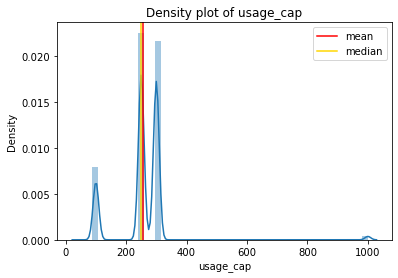

/Users/thomasadler/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


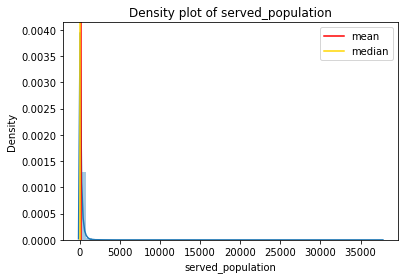

/Users/thomasadler/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


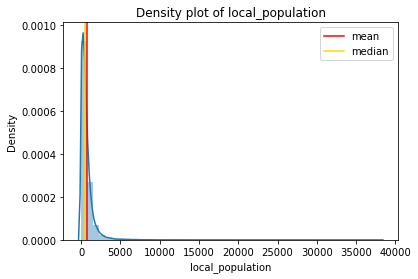

/Users/thomasadler/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


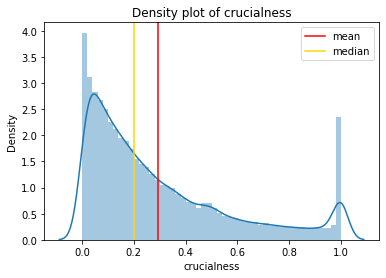

/Users/thomasadler/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


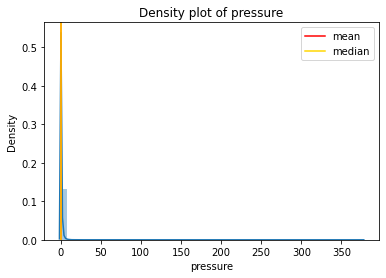

In [22]:
#showing distribution of value we want to inpute and where mean/median is situated
for col in cols_to_impute:
    plt.figure()
    sns.distplot(uganda_water_df_clean[col])
    plt.axvline(uganda_water_df_clean[col].mean(), c='r', label='mean')
    plt.axvline(uganda_water_df_clean[col].median(), c='gold', label='median')
    plt.legend()
    plt.title(f'Density plot of {col}')
    plt.show() 

We can confirm that the median is the better choice as it represents our data better.

In [23]:
#constructing columns of interest
median_columns_adm4=list(cols_to_impute )
median_columns_adm4.append('clean_adm4')

#check
median_columns_adm4

['usage_cap',
 'served_population',
 'local_population',
 'crucialness',
 'pressure',
 'clean_adm4']

In [24]:
#group by adm4, with median
median_adm4=uganda_water_df_clean[median_columns_adm4].groupby('clean_adm4').median()
median_adm4.reset_index(inplace=True)

#check
median_adm4.head()

,clean_adm4,usage_cap,served_population,local_population,crucialness,pressure
0,Abako,250.0,107.5,548.0,0.229287,0.556000
1,Abanga,250.0,32.0,586.0,0.066667,0.136000
2,Abarilela,300.0,212.0,483.0,0.481481,0.706667
3,Aber,300.0,150.5,538.0,0.281655,0.360000
4,Abia,300.0,289.0,561.0,0.566890,1.063333


In [25]:
#merge median dataset with original dataset
uganda_water_df_clean=pd.merge(uganda_water_df_clean, median_adm4, how='left',\
                               left_on=uganda_water_df_clean['clean_adm4'],\
                               right_on=median_adm4['clean_adm4'], suffixes=(None, '_median_adm4'))

#check
uganda_water_df_clean.head()

,key_0,row_id,source,lat_deg,lon_deg,report_date,status_id,facility_type,clean_country_name,clean_adm1,...,served_population,local_population,crucialness,pressure,clean_adm4_median_adm4,usage_cap_median_adm4,served_population_median_adm4,local_population_median_adm4,crucialness_median_adm4,pressure_median_adm4
0,Kabambiro,651231,Water For People,0.158537,30.490643,2005-09-07,1,Improved,Uganda,Western,...,NaN,NaN,NaN,NaN,Kabambiro,250.0,18.5,283.5,0.075003,0.076667
1,Nyabbani,652323,Water For People,0.070597,30.415651,2005-09-07,1,Improved,Uganda,Western,...,NaN,NaN,NaN,NaN,Nyabbani,300.0,35.0,274.0,0.166070,0.140000
2,Kabambiro,654375,Water For People,0.158667,30.490551,2005-09-07,1,Improved,Uganda,Western,...,NaN,NaN,NaN,NaN,Kabambiro,250.0,18.5,283.5,0.075003,0.076667
3,Kamwenge,654822,Water For People,0.208128,30.386393,2005-09-07,1,Improved,Uganda,Western,...,NaN,NaN,NaN,NaN,Kamwenge,250.0,9.0,165.5,0.085952,0.040000
4,Kicheche,660256,Water For People,-0.134680,30.351593,2005-09-07,1,Improved,Uganda,Western,...,NaN,NaN,NaN,NaN,Kicheche,250.0,34.0,366.0,0.143842,0.192000


In [26]:
#fill null values with the median value of its region (adm4)
for col in cols_to_impute:
    uganda_water_df_clean[col] = uganda_water_df_clean[col].fillna(uganda_water_df_clean\
                                                                   [f'{col}_median_adm4'])


In [27]:
#removing key column resulting from the merge
del uganda_water_df_clean[uganda_water_df_clean.columns[0]]
uganda_water_df_clean.head()

#check remaining null values
uganda_water_df_clean.isna().sum()

row_id                               0
source                               0
lat_deg                              0
lon_deg                              0
report_date                          0
status_id                            0
facility_type                        0
clean_country_name                   0
clean_adm1                           0
clean_adm2                           0
clean_adm3                           0
clean_adm4                           0
distance_to_primary                  0
distance_to_secondary                0
distance_to_tertiary                 0
distance_to_city                     0
distance_to_town                     0
usage_cap                            0
staleness_score                      0
is_latest                            0
location_id                          0
cluster_size                         0
clean_country_id                     0
new_georeferenced_column_            0
lat_lon_deg                          0
count                    

In [28]:
#same process with adm3

#constructing columns of interest
median_columns_adm3=list(cols_to_impute )
median_columns_adm3.append('clean_adm3')

#group by adm3, with median
median_adm3=uganda_water_df_clean[median_columns_adm3].groupby('clean_adm3').median()
median_adm3.reset_index(inplace=True)

#merge median dataset with original dataset
uganda_water_df_clean=pd.merge(uganda_water_df_clean, median_adm3, how='left',\
                               left_on=uganda_water_df_clean['clean_adm3'],\
                               right_on=median_adm3['clean_adm3'], suffixes=(None, '_median_adm3'))

#fill null values with the median value of its region (adm3)
for col in cols_to_impute:
    uganda_water_df_clean[col] = uganda_water_df_clean[col].fillna(uganda_water_df_clean\
                                                                   [f'{col}_median_adm3'])

#removing key column resulting from the merge
del uganda_water_df_clean[uganda_water_df_clean.columns[0]]
uganda_water_df_clean.head()

#check remaining null values
uganda_water_df_clean.isna().sum()

row_id                               0
source                               0
lat_deg                              0
lon_deg                              0
report_date                          0
status_id                            0
facility_type                        0
clean_country_name                   0
clean_adm1                           0
clean_adm2                           0
clean_adm3                           0
clean_adm4                           0
distance_to_primary                  0
distance_to_secondary                0
distance_to_tertiary                 0
distance_to_city                     0
distance_to_town                     0
usage_cap                            0
staleness_score                      0
is_latest                            0
location_id                          0
cluster_size                         0
clean_country_id                     0
new_georeferenced_column_            0
lat_lon_deg                          0
count                    

In [29]:
#same process with adm2

#constructing columns of interest
median_columns_adm2=list(cols_to_impute )
median_columns_adm2.append('clean_adm2')

#group by adm2, with median
median_adm2=uganda_water_df_clean[median_columns_adm2].groupby('clean_adm2').median()
median_adm2.reset_index(inplace=True)

#merge median dataset with original dataset
uganda_water_df_clean=pd.merge(uganda_water_df_clean, median_adm2, how='left',\
                               left_on=uganda_water_df_clean['clean_adm2'],\
                               right_on=median_adm2['clean_adm2'], suffixes=(None, '_median_adm2'))

#fill null values with the median value of its region (adm2)
for col in cols_to_impute:
    uganda_water_df_clean[col] = uganda_water_df_clean[col].fillna(uganda_water_df_clean\
                                                                   [f'{col}_median_adm2'])
#removing key column resulting from the merge
del uganda_water_df_clean[uganda_water_df_clean.columns[0]]
uganda_water_df_clean.head()

#check remaining null values
uganda_water_df_clean.isna().sum()

row_id                               0
source                               0
lat_deg                              0
lon_deg                              0
report_date                          0
status_id                            0
facility_type                        0
clean_country_name                   0
clean_adm1                           0
clean_adm2                           0
clean_adm3                           0
clean_adm4                           0
distance_to_primary                  0
distance_to_secondary                0
distance_to_tertiary                 0
distance_to_city                     0
distance_to_town                     0
usage_cap                            0
staleness_score                      0
is_latest                            0
location_id                          0
cluster_size                         0
clean_country_id                     0
new_georeferenced_column_            0
lat_lon_deg                          0
count                    

In [30]:
#same process with adm1

#constructing columns of interest
median_columns_adm1=list(cols_to_impute )
median_columns_adm1.append('clean_adm1')

#group by adm2, with median
median_adm1=uganda_water_df_clean[median_columns_adm1].groupby('clean_adm1').median()
median_adm1.reset_index(inplace=True)

#merge median dataset with original dataset
uganda_water_df_clean=pd.merge(uganda_water_df_clean, median_adm1, how='left',\
                               left_on=uganda_water_df_clean['clean_adm1'],\
                               right_on=median_adm1['clean_adm1'], suffixes=(None, '_median_adm1'))

#fill null values with the median value of its region (adm2)
for col in cols_to_impute:
    uganda_water_df_clean[col] = uganda_water_df_clean[col].fillna(uganda_water_df_clean\
                                                                   [f'{col}_median_adm1'])
#removing key column resulting from the merge
del uganda_water_df_clean[uganda_water_df_clean.columns[0]]
uganda_water_df_clean.head()

#check remaining null values
uganda_water_df_clean.isna().sum()

row_id                               0
source                               0
lat_deg                              0
lon_deg                              0
report_date                          0
status_id                            0
facility_type                        0
clean_country_name                   0
clean_adm1                           0
clean_adm2                           0
clean_adm3                           0
clean_adm4                           0
distance_to_primary                  0
distance_to_secondary                0
distance_to_tertiary                 0
distance_to_city                     0
distance_to_town                     0
usage_cap                            0
staleness_score                      0
is_latest                            0
location_id                          0
cluster_size                         0
clean_country_id                     0
new_georeferenced_column_            0
lat_lon_deg                          0
count                    

In [31]:
#fill the final null values with the median value of the whole dataset
for col in cols_to_impute:
    uganda_water_df_clean[col] = uganda_water_df_clean[col].fillna(uganda_water_df_clean[col].median())

#check remaining null values
uganda_water_df_clean.isna().sum()

row_id                               0
source                               0
lat_deg                              0
lon_deg                              0
report_date                          0
status_id                            0
facility_type                        0
clean_country_name                   0
clean_adm1                           0
clean_adm2                           0
clean_adm3                           0
clean_adm4                           0
distance_to_primary                  0
distance_to_secondary                0
distance_to_tertiary                 0
distance_to_city                     0
distance_to_town                     0
usage_cap                            0
staleness_score                      0
is_latest                            0
location_id                          0
cluster_size                         0
clean_country_id                     0
new_georeferenced_column_            0
lat_lon_deg                          0
count                    

In [32]:
#drop intermediate median columns
uganda_water_df_clean_final=uganda_water_df_clean.iloc[:,0:36]

#check
uganda_water_df_clean_final.head()

,row_id,source,lat_deg,lon_deg,report_date,status_id,facility_type,clean_country_name,clean_adm1,clean_adm2,...,water_source_clean,water_source_category,wpdx_id,install_year,management_clean,status_clean,served_population,local_population,crucialness,pressure
0,651231,Water For People,0.158537,30.490643,2005-09-07,1,Improved,Uganda,Western,Kamwenge,...,NaN,NaN,NaN,NaT,NaN,NaN,18.5,283.5,0.075003,0.076667
1,652323,Water For People,0.070597,30.415651,2005-09-07,1,Improved,Uganda,Western,Kitagwenda,...,Protected Spring,Spring,NaN,NaT,NaN,NaN,35.0,274.0,0.166070,0.140000
2,654375,Water For People,0.158667,30.490551,2005-09-07,1,Improved,Uganda,Western,Kamwenge,...,NaN,NaN,NaN,NaT,NaN,NaN,18.5,283.5,0.075003,0.076667
3,654822,Water For People,0.208128,30.386393,2005-09-07,1,Improved,Uganda,Western,Kamwenge,...,Borehole,Well,NaN,NaT,NaN,NaN,9.0,165.5,0.085952,0.040000
4,660256,Water For People,-0.134680,30.351593,2005-09-07,1,Improved,Uganda,Western,Kitagwenda,...,Protected Spring,Spring,6GFGV982+4JG,NaT,NaN,NaN,34.0,366.0,0.143842,0.192000


We will not fill the non-numeric columns that still have missing values as the proportion of missing values is too great (15-25%). We will decide what to do with them later in our analysis. We must do this with great care as omitting or filling these columns/rows will have a large impact on the dataset.

In [33]:
#export to cleaned dataset to csv
uganda_water_df_clean_final.to_csv(filepath + 'uganda_water_df_clean.csv')